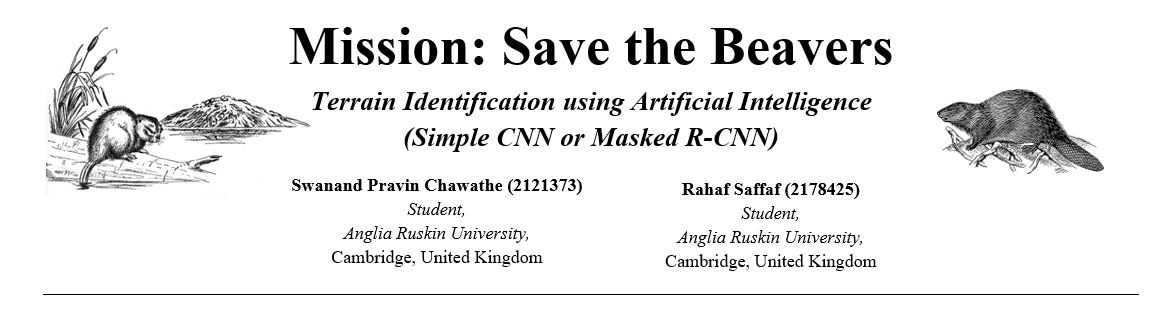

### EXPERIMENT III - part A
(Instance Segmentation using Mask R-CNN) - Single Label/Anotation

**Summary:** Starting with a simple or basic CNN model in Experiment I yeilding us high accuracy, learning from its results and studying about Mask RCNN, we carried out Experiment II using the Semantic Segmentation and did manage to identify the Terrain to a certain extent. We then decided to experiment on Instance Segmentation, where in multiple instances of an individual Terrain could be identified. This would help our Mission to Save Beavers by clearly having the Image with distinguished instances of their presence in a single image.

**Approach**
We used the method of Transfer Learning and a solution inline and ontop of the Mask-RCNN, however a better version that worked on Collaborate GPU. Referring to Experiments conducted by Sergio Canu, where in a simple Mask R-CNN could help identify the objects and instances in an image, we thought of utilising this research and trying to experiment with Beaver Data set to see if it would work to help our Mission.
We decided to start with a single lable called "Beaver Habitat" and a small data set of images that contained only "Beaver Dams or Lodges" as based on our learnings and experiments we now knew running a code on GPU is a hit or miss with GPU and CUDA and Tensorflow compatibality issues, to the Model too complex and heavy with large and huge number of images, making the processing slow, interrupting in between.

**Data Annotation:**
Using an Open Source free tool named MakeSense, we quickly managed to label around 19 images, sample as below. The tool provided an option to export a json which contained annotation. As there was no presence of Image on the cloud, we had to manually upload the original images when running the model.

The train/test was split on the go in the code.


**Sample MakeSense tool Snippet:**
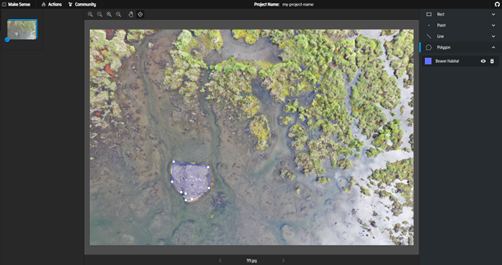



**Reference:**

Canu, S. (2021). Instance Segmentation MASK R-CNN | with Python and Opencv. [online] Pysource. Available at: https://pysource.com/2021/05/18/instance-segmentation-mask-r-cnn-with-python-and-opencv/ [Accessed 12 Apr. 2023]



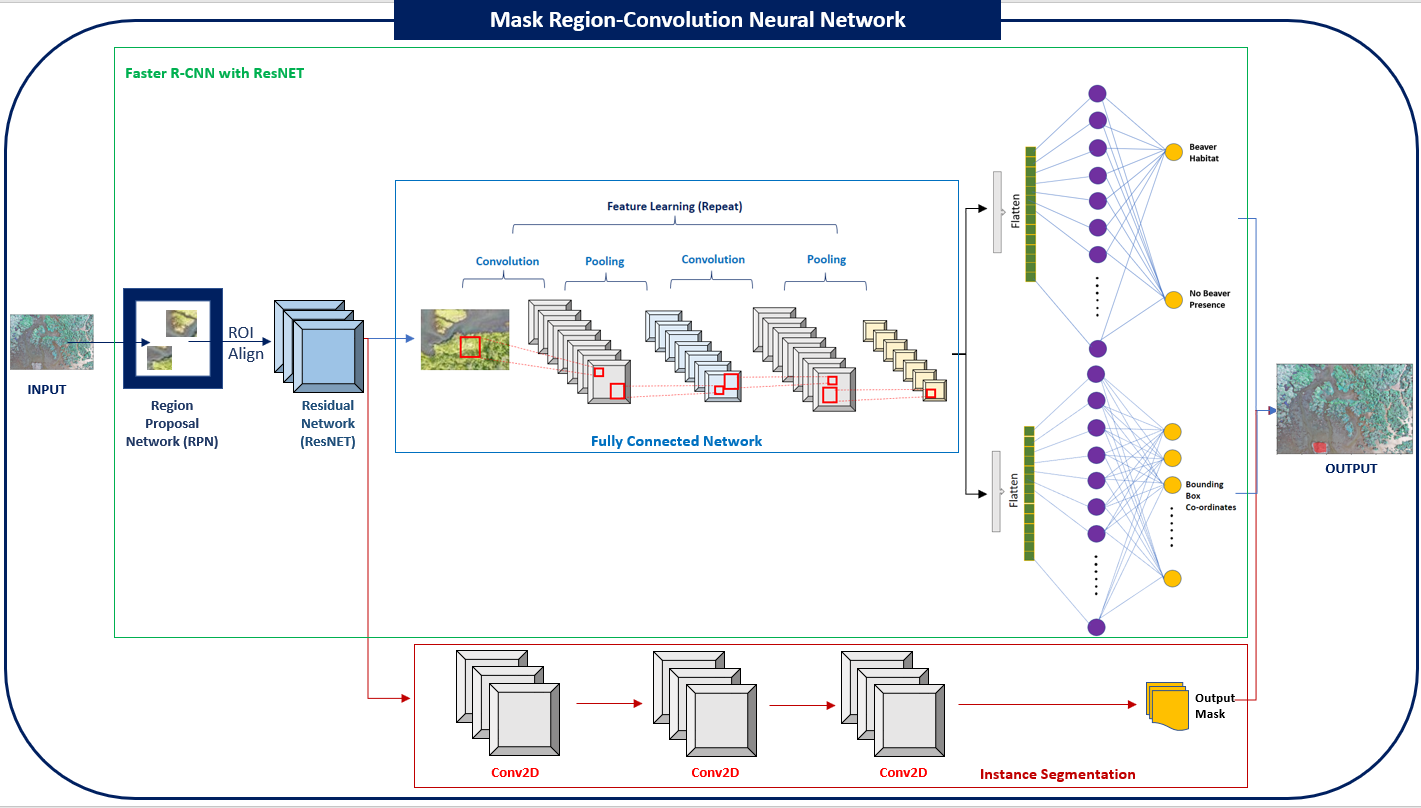

## **1. Installation**

Installing Tensorflow 2.5 and matching CUDA on Google Collaboratory, this would help the code run on GPU and help us work on image processing for Mask R-CNN

In [2]:
# Update CUDA for TF 2.5
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
# Check if package has been installed
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
# Upgrade Tensorflow
!pip install --upgrade tensorflow==2.5.0

--2023-04-16 01:19:01--  https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
Resolving developer.download.nvidia.com (developer.download.nvidia.com)... 152.195.19.142
Connecting to developer.download.nvidia.com (developer.download.nvidia.com)|152.195.19.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 430460776 (411M) [application/x-deb]
Saving to: ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb’

libcudnn8_8.1.0.77- 100%[===================>] 410.52M   205MB/s    in 2.0s    

2023-04-16 01:19:03 (205 MB/s) - ‘libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb’ saved [430460776/430460776]

dpkg: warning: downgrading libcudnn8 from 8.7.0.84-1+cuda11.8 to 8.1.0.77-1+cuda11.2
(Reading database ... 122349 files and directories currently installed.)
Preparing to unpack libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb ...
Unpacking libcudnn8 (8.1.0.77-1+cuda11.2) over (8.7.0.84-1+cuda11.8) ...
Setting up libcudnn8 (8.1.0.77-1+c

**Loading the Mask-RCNN**

Using Transfer Learning and trying to reuse the concept, we will be using the Mask R-CNN which was built with famous COCO data set as the base.

In below step we Install Mask R-CNN

In [3]:
!wget https://psfiles.link/project/mask_rcnn_colab/mrcnn_demo_PIBVGJTEFX.zip
!unzip mrcnn_demo_PIBVGJTEFX.zip
import sys
sys.path.append("/content/maskrcnn_colab/mrcnn_demo")
from m_rcnn import *
%matplotlib inline

--2023-04-16 01:20:54--  https://psfiles.link/project/mask_rcnn_colab/mrcnn_demo_PIBVGJTEFX.zip
Resolving psfiles.link (psfiles.link)... 34.90.26.83
Connecting to psfiles.link (psfiles.link)|34.90.26.83|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59799 (58K) [application/zip]
Saving to: ‘mrcnn_demo_PIBVGJTEFX.zip’

mrcnn_demo_PIBVGJTE 100%[===================>]  58.40K  --.-KB/s    in 0.1s    

2023-04-16 01:20:54 (575 KB/s) - ‘mrcnn_demo_PIBVGJTEFX.zip’ saved [59799/59799]

Archive:  mrcnn_demo_PIBVGJTEFX.zip
   creating: maskrcnn_colab/
   creating: maskrcnn_colab/mrcnn_demo/
  inflating: maskrcnn_colab/mrcnn_demo/config.py  
  inflating: maskrcnn_colab/mrcnn_demo/model.py  
  inflating: maskrcnn_colab/mrcnn_demo/m_rcnn.py  
  inflating: maskrcnn_colab/mrcnn_demo/parallel_model.py  
  inflating: maskrcnn_colab/mrcnn_demo/utils.py  
  inflating: maskrcnn_colab/mrcnn_demo/visualize.py  
VERS 0.5 - updated 11/03/2023


/content/maskrcnn_colab/mrcnn_demo/model.py:2378: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if os.name is 'nt':


... done downloading pretrained model!


In [4]:
# From the lessons learnt: the most difficult task is to get a GPU on Collaboratory and to make the code run on the GPU, the below 
# helps us check the type of GPU we are allocated by Google.
!nvidia-smi

Sun Apr 16 01:21:06 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## **2. Image Dataset**

Load Beaver Habitat annotated dataset and Beaver images


**Pre-requisite:** 

>* "labels_my-project-name_2023-04-11-09-22-17.json" is a file exported from MakeSense which creates 19 images  annotated to a single class of "Beaver Habitat"**
This file has to be manually uploaded under the "content" folder on Collab

>* The 19 original images are to be used and are to be uploaded under the "InpDataset" folder that is created in the below line. A Beavers.zip folder will contain the images that are to be used.

In [98]:
# defin the path for the json file that holds the annotations
#we also make a folder InpDataset

annotations_path = "/content/labels_my-project-name_2023-04-11-09-22-17.json"
os.makedirs("InpDataset")



**Read the Annotation and virtually split in test and train**

In [ ]:
dataset_train = load_image_dataset(os.path.join("/content/", annotations_path), "/content/InpDataset", "train")
dataset_val = load_image_dataset(os.path.join("/content/", annotations_path), "/content/InpDataset", "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  /content/labels_my-project-name_2023-04-11-09-22-17.json
Annotation json path:  /content/labels_my-project-name_2023-04-11-09-22-17.json
Train: 17
Validation: 2
Classes: 1


**Check Successful loading of Annotation and Image in the dataframe "dataset_train"**

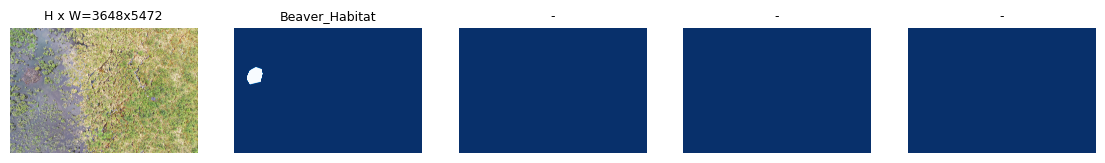

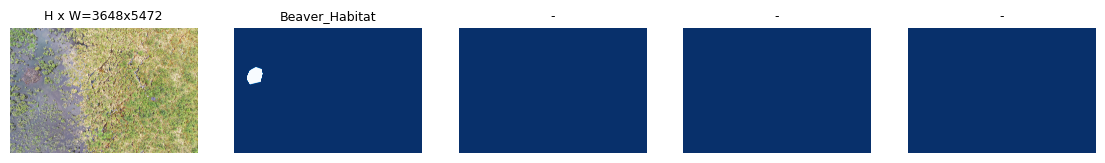

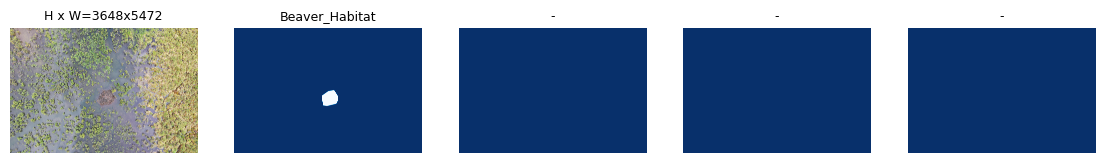

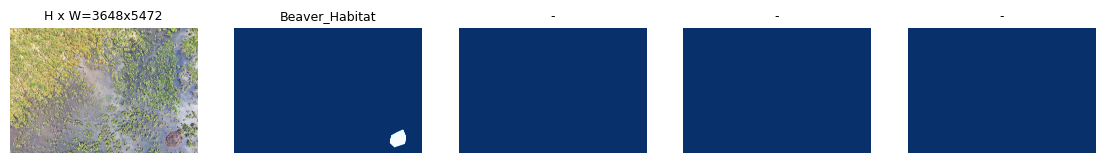

In [ ]:
# Load image samples
display_image_samples(dataset_train)

## **3. Training**

Train Mask RCNN on your Beaver Dataset.
The famous coco data set is used to pretrain the model/pre load the model and is further trained using the Beaver Dataset

In [ ]:
# Load Configuration
config = CustomConfig(class_number)
# config.display()
model = load_training_model(config)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


/content/maskrcnn_colab/mask_rcnn_coco.h5


In [ ]:
# Start Training
# This runs 5 epochs of 500 step each, the speed is dependant on the GPU assigned from Google 
train_head(model, dataset_train, dataset_train, config)


Starting at epoch 0. LR=0.001

Checkpoint Path: /content/maskrcnn_colab/logs/object20230415T2224/mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_conv4       (TimeDistributed)
mrcnn_mask_bn4         (TimeDistributed)
mrcnn_mask_deconv  

## **4. Detection (test  model on selective image)**

In [ ]:
# Load Test Model
# The latest trained model will be loaded
#test_model, inference_config = load_test_model(class_number)
# As we want to custom select the models which are stored under the "/content/maskrcnn_colab/logs/" we wont run the random image test.
# we will run a custom code that helps us check the outcome on images of our choice.

Instructions for updating:
Use fn_output_signature instead


Loading weights from  /content/maskrcnn_colab/logs/object20230415T2224/mask_rcnn_object_0005.h5
Re-starting from epoch 5


In [96]:
# Test on a random image# As the data set is very small, we are not using this
#test_random_image(test_model, dataset_val, inference_config)

**Test Model for selective Images**

In [78]:
import cv2

test_model, inference_config = load_inference_model(1, "/content/mask_rcnn_object_0005.h5")
# specify the correct path under the logs folder of the model to test for 
# as the resources were exhausted we loaded the .h5 file separately 
# we can choose any of the 5 models that get created and check for accuracy, as the losses were minimal for the latest model we 
#choose to use the same


Loading weights from  /content/mask_rcnn_object_0005 (2).h5


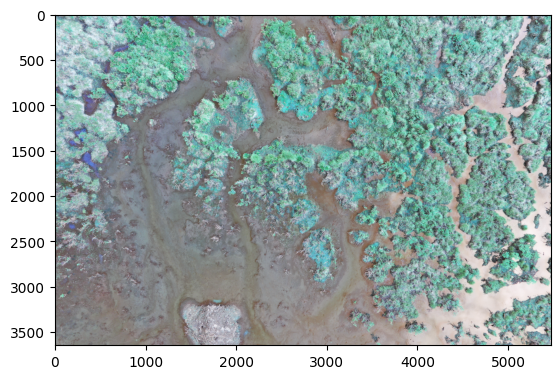

In [103]:
# preview Original Image for reference, not you have to pload the test images under the ImgDataset folder and change the path below
img = cv2.imread("/content/ImgDataset/100.jpg") # using image 100 not in train data set to test the model
imshow(img)
image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r = test_model.detect([image])[0]

**Results**

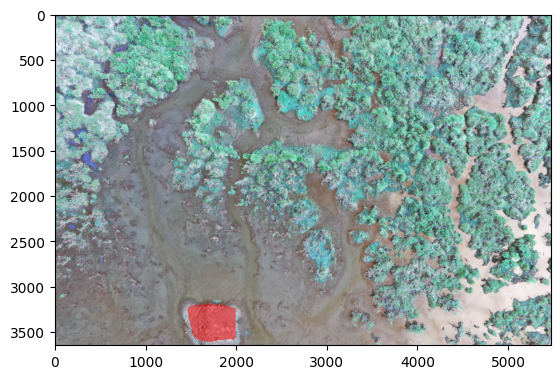

In [104]:
from mrcnn_demo.visualize import random_colors, get_mask_contours, draw_mask
from google.colab.patches import cv2_imshow

#get co-ordinates and show on image
objects_count = len(r["class_ids"])
colors = random_colors(objects_count)
for i in range(objects_count):
  mask = r["masks"][:,:, i]
  contours = get_mask_contours(mask)
  for cnt in contours: 
    cv2.polylines(img, [cnt], True, colors[i], 2)
    img = draw_mask(img, [cnt],colors[i])

imshow(img)


**Observation:**
>* The Experiment III part A is a success, we have managed to identify Beaver presence in a random Image, though only one class,  it is effective and successful.
>* Few Sample tests on different images made it evident that this Model too was suitable for our Mission to Save the Beavers, rather had marginal better performanc compared to the "Exp II", we could also see two Instances of Beaver Habitat identified in one of the test.
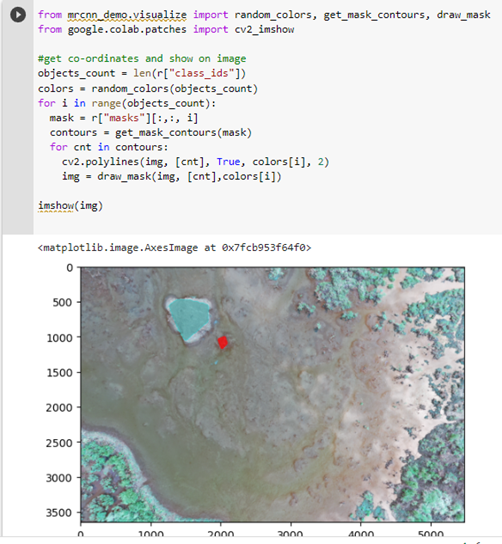
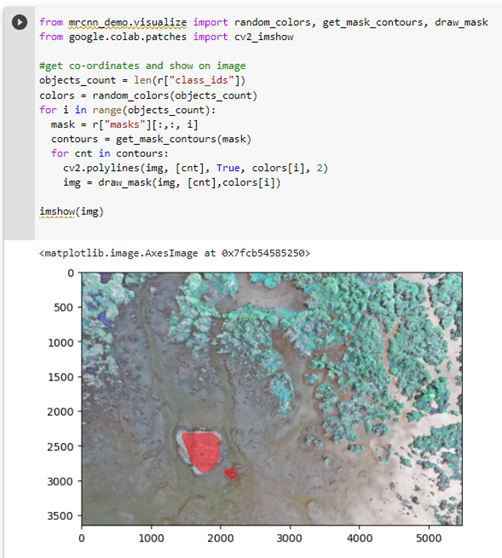
    
    
**Take Away**    
>* Mask R-CNN Instance Segmentation works wonders when we are working to identify objects or specific subjects in our case Beaver presence.
>* They have an advantage over the Semantic Segmentation, it identifies multiple instances of same class in a particular image.
>* The code took a whooping 2.5 hours just for 19 images as input and one label. with GPU hitting the red line throughout, demanding high computation powers.
>* Post 2.5 hours, we had exhausted almost all resources and the Colaboratory had gone numb, sometimes even crashed, thus with difficulty the final model file could be downloaded, a separat instance had to be run only to load the final model file and test it for performance.

**Way Ahead**
>* Having Making the model work for our Mission to save Beavers, it is worth putting effort to identify multi Terrain/labels in an image.
>* This calls for another Experiment III part B, hoping we get a complete working multi class instance segmentation would be an achievement